In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import svm

In [2]:
mobil=pd.read_csv('Dataset/Mobile_data.csv')

In [3]:
mobil.head()

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0         20       756  2549     9     7         19            1  
1        905      1988  2631    17     3          7            2  
2       1263      1716  2603    11     2          9            2  
3       1216      1786  2769    16     8         11            2  
4       1208      1212  1411     8     2         15            1

In [4]:
mobil.info() #no missing values and no object dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
mobil.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [6]:
mobil.shape

(2000, 15)

In [7]:
df=mobil.drop('battery_power',axis=1)

In [19]:
mobil['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_height'>

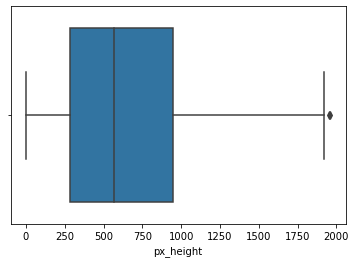

In [8]:
sns.boxplot('px_height',data=mobil)

<AxesSubplot:>

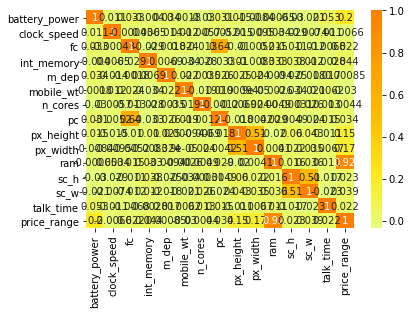

In [9]:

sns.heatmap(mobil.corr(),cmap='Wistia',annot=True)

In [10]:
mobil.groupby(['price_range']).count()

battery_power  clock_speed   fc  int_memory  m_dep  mobile_wt  \
price_range                                                                  
0                      500          500  500         500    500        500   
1                      500          500  500         500    500        500   
2                      500          500  500         500    500        500   
3                      500          500  500         500    500        500   

             n_cores   pc  px_height  px_width  ram  sc_h  sc_w  talk_time  
price_range                                                                 
0                500  500        500       500  500   500   500        500  
1                500  500        500       500  500   500   500        500  
2                500  500        500       500  500   500   500        500  
3                500  500        500       500  500   500   500        500

In [ ]:
df=df.drop('')

In [37]:
X = mobil.drop('price_range',axis=1)
y = mobil["price_range"]

In [12]:
XScaled  = X.apply(zscore)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=0)#scaled

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)#without scaling

In [48]:
NNH = KNeighborsClassifier(n_neighbors= 15,metric='euclidean' )

In [49]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [50]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9416666666666667

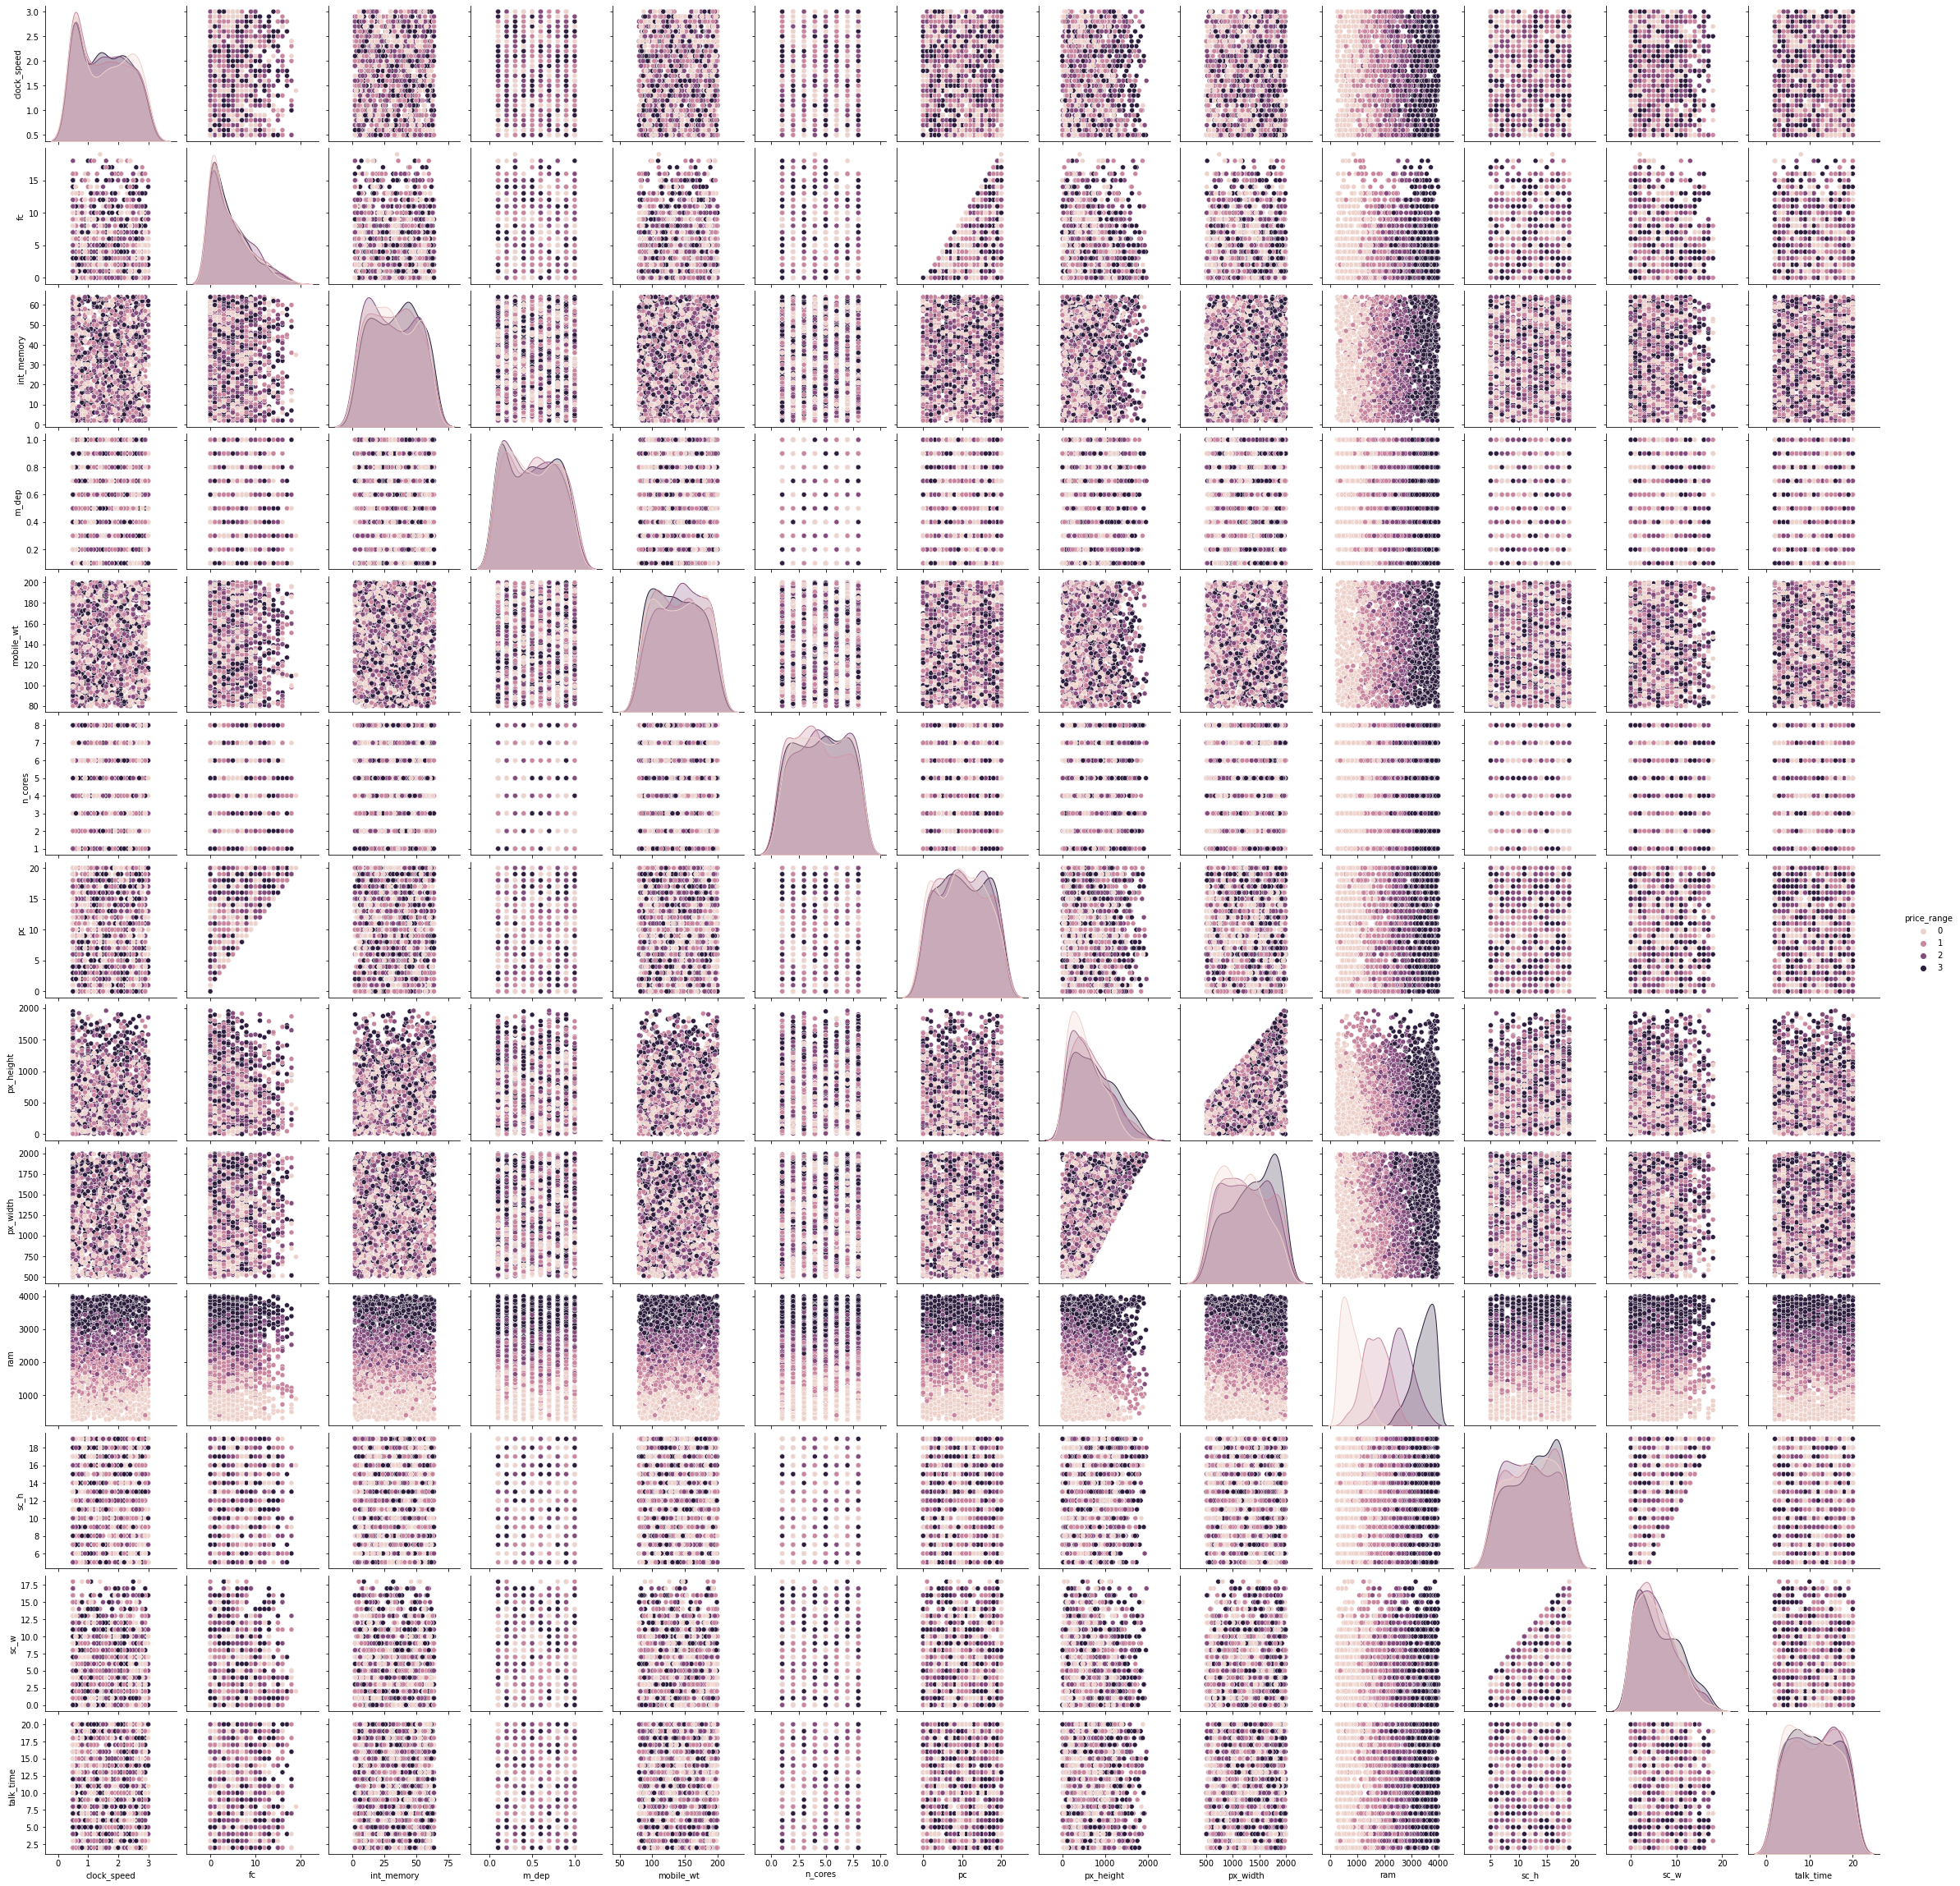

In [18]:
sns.pairplot(df,hue='price_range')

In [ ]:
##

In [ ]:
from sklearn.preprocessing import RobustScaler

In [23]:
df_model = mobil.copy()

In [24]:
df_model.head()

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0         20       756  2549     9     7         19            1  
1        905      1988  2631    17     3          7            2  
2       1263      1716  2603    11     2          9            2  
3       1216      1786  2769    16     8         11            2  
4       1208      1212  1411     8     2         15            1

In [ ]:
scaler = RobustScaler()

In [ ]:
features = [['fc','pc','px_height','px_width','ram','battery_power','clock_speed','n_cores']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 15,metric='euclidean')

In [ ]:
X = mobil.drop('price_range',axis=1)
y = mobil["price_range"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

In [22]:
print(confusion_matrix(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
#standard scalar

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
features = [['fc','pc','px_height','px_width','clock_speed','n_cores']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 19,metric='euclidean')

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
## svm 

In [ ]:
XScaled  = X.apply(zscore)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=0)#scaled

In [ ]:
clf=svm.SVC(gamma=0.04,C=3,kernel='sigmoid')

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
clf=svm.SVC(gamma=0.04,C=2,kernel='linear')

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
###evaluating knn score

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [25]:
x = mobil.drop('price_range',axis=1)
y = mobil["price_range"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
pred = knn.predict(X_test)

In [30]:
pred

array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 1, 2, 3, 0, 0, 3, 3, 2, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 2, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 3, 3, 1, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 2, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 3, 3, 0, 1, 3,
       2, 0, 3, 3, 2, 1, 2, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 3,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [31]:
print(confusion_matrix(y_test,pred))

[[145   6   0   0]
 [ 10 117   8   0]
 [  0   8 126  17]
 [  0   0  15 148]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       151
           1       0.89      0.87      0.88       135
           2       0.85      0.83      0.84       151
           3       0.90      0.91      0.90       163

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



## choosing a k value

In [34]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,df['price_range'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy Rate')

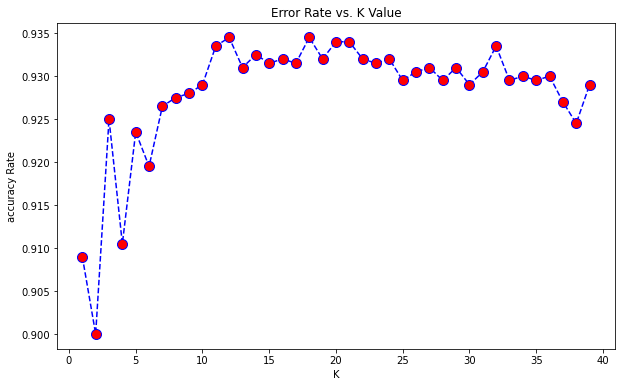

In [35]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

In [36]:
## after k==13 the accuracy rate is increasing constantly so we can consider k=13

In [51]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error Rate')

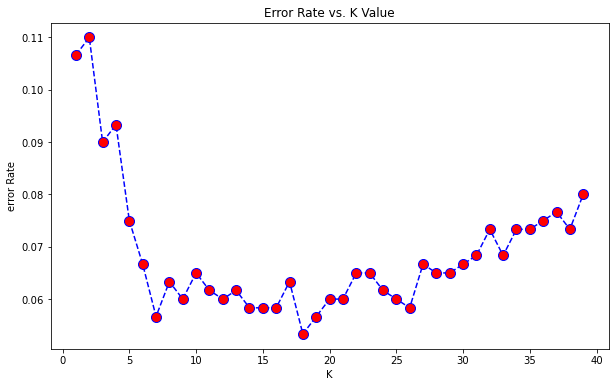

In [52]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error Rate')

In [53]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[150   1   0   0]
 [  7 125   3   0]
 [  0   6 135  10]
 [  0   0   8 155]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.95      0.93      0.94       135
           2       0.92      0.89      0.91       151
           3       0.94      0.95      0.95       163

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

